In [3]:
import pandas as pd

# uploading the data
csv_path = 'C:/Users/PC-024/Documents/data22/extracted_covid19/covid_19_clean_complete.csv'  # Replace with your correct path

# Load the dataset
df = pd.read_csv(csv_path)

# Display the first few rows to check if it's loaded properly
print(df.head())

  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [3]:
# Check for missing values
print(df.isnull().sum())

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check the data types and the first few rows again after conversion
print(df.dtypes)
print(df.head())


Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64
Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object
  Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            

In [4]:
# Drop rows with missing 'Province/State'
df = df.dropna(subset=['Province/State'])

# Check the result
print(df.isnull().sum())


Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64


In [6]:
df['Death_Rate'] = df['Deaths'] / df['Confirmed'] * 100
df['Recovery_Rate'] = df['Recovered'] / df['Confirmed'] * 100


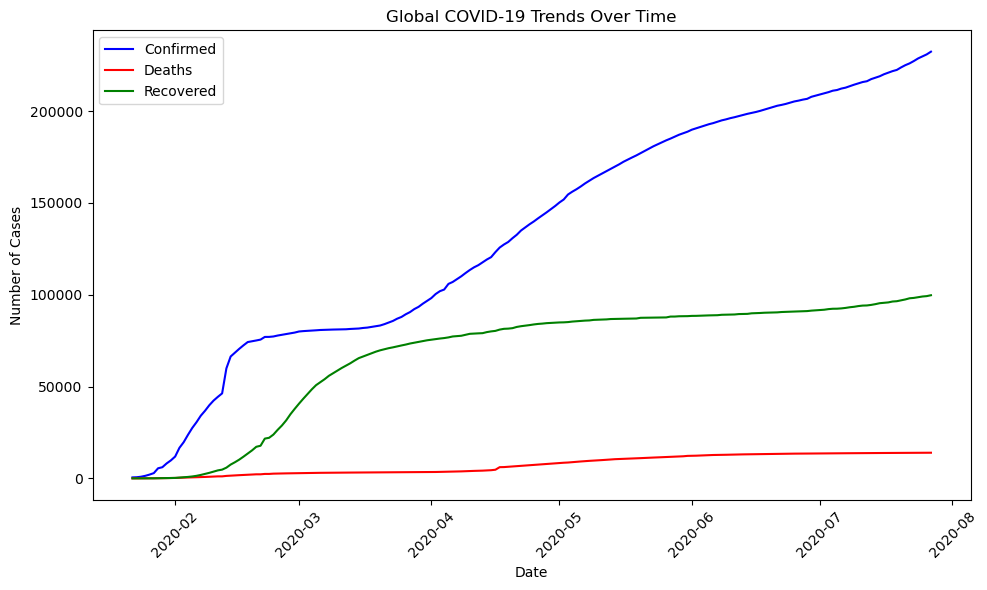

In [7]:
import matplotlib.pyplot as plt

# Grouping the data by date and summing up the confirmed, deaths, and recovered cases
df_grouped = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plotting the trends
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped['Confirmed'], label='Confirmed', color='blue')
plt.plot(df_grouped.index, df_grouped['Deaths'], label='Deaths', color='red')
plt.plot(df_grouped.index, df_grouped['Recovered'], label='Recovered', color='green')

# Adding titles and labels
plt.title('Global COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


In [8]:
df['Death_Rate'] = df['Deaths'] / df['Confirmed'] * 100
df['Recovery_Rate'] = df['Recovered'] / df['Confirmed'] * 100


In [9]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


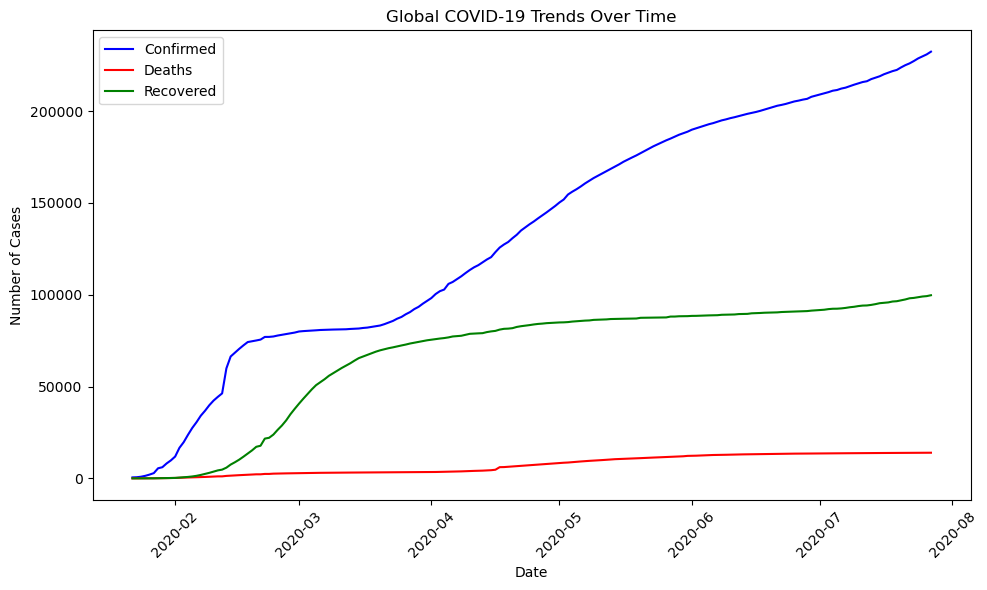

In [10]:
import matplotlib.pyplot as plt

# Grouping the data by date and summing up the confirmed, deaths, and recovered cases
df_grouped = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plotting the trends
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped['Confirmed'], label='Confirmed', color='blue')
plt.plot(df_grouped.index, df_grouped['Deaths'], label='Deaths', color='red')
plt.plot(df_grouped.index, df_grouped['Recovered'], label='Recovered', color='green')

# Adding titles and labels
plt.title('Global COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


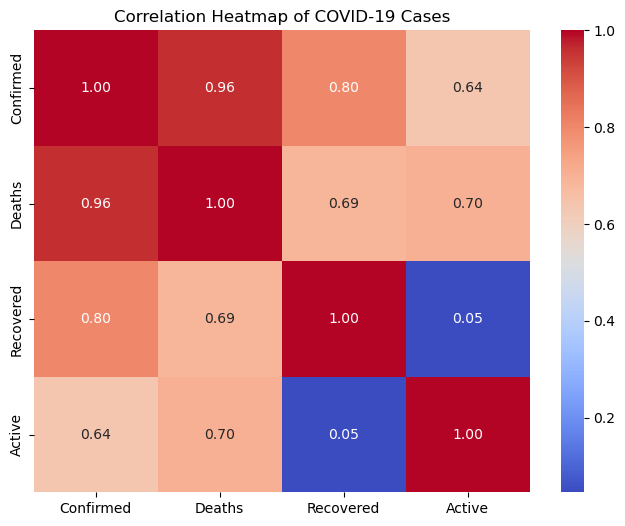

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns for correlation analysis
correlation_data = df[['Confirmed', 'Deaths', 'Recovered', 'Active']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of COVID-19 Cases')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Preprocessing: We will predict 'Confirmed' cases based on 'Date' and 'Country/Region'
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is in datetime format
df['Date'] = df['Date'].map(lambda x: x.toordinal())  # Convert date to ordinal for use in the model

# Select relevant columns for the model
X = df[['Date', 'Country/Region']]  # Features: Date and Country
y = df['Confirmed']  # Target: Confirmed cases

# Convert categorical column ('Country/Region') to numerical values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Country/Region'] = le.fit_transform(X['Country/Region'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-Squared (R2): {r2}')


Mean Squared Error (MSE): 85278289.92714801
Root Mean Squared Error (RMSE): 9234.62451468104
R-Squared (R2): 0.023443841480916272


C:\Users\PC-024\AppData\Local\Temp\ipykernel_3908\4041366319.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Country/Region'] = le.fit_transform(X['Country/Region'])


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Convert categorical data 'Country/Region' into numeric
X['Country/Region'] = le.fit_transform(X['Country/Region'])

# Select features
features = ['Lat', 'Long', 'Deaths', 'Recovered', 'Active', 'Country/Region']
X = df[features]
y = df['Confirmed']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Random Forest Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2}")


C:\Users\PC-024\AppData\Local\Temp\ipykernel_3908\3381903530.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Country/Region'] = le.fit_transform(X['Country/Region'])


ValueError: could not convert string to float: 'China'

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to 'Country/Region' before splitting
df['Country/Region'] = le.fit_transform(df['Country/Region'])

# Select features
features = ['Lat', 'Long', 'Deaths', 'Recovered', 'Active', 'Country/Region']
X = df[features]
y = df['Confirmed']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Random Forest Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2}")


Random Forest Model Evaluation:
Mean Squared Error (MSE): 57403.464200340924
Root Mean Squared Error (RMSE): 239.59020055156873
R-Squared (R2): 0.999342649734967


Mean Squared Error (MSE): 9681841342.56078
Root Mean Squared Error (RMSE): 98396.34821760806
R-Squared (R2): 0.4911579181689857


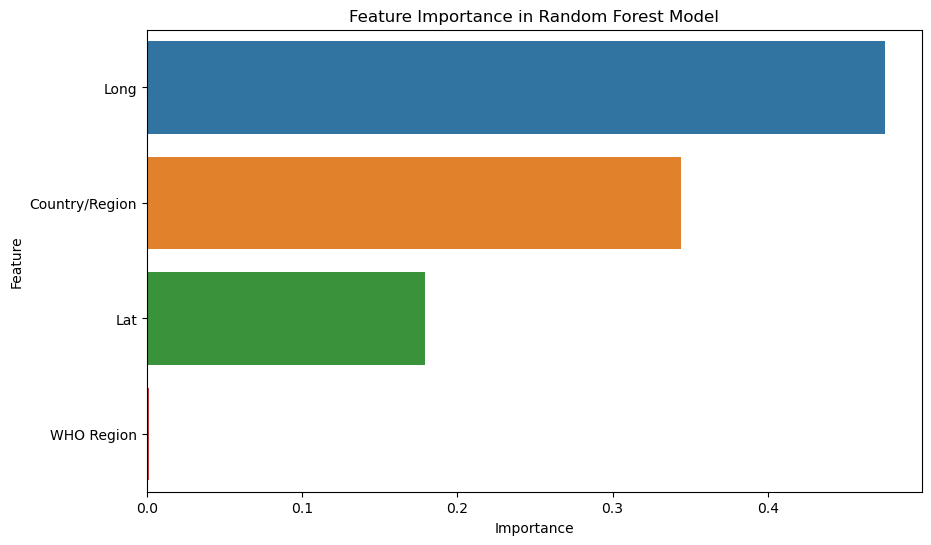

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
csv_path = 'C:/Users/PC-024/Documents/data22/extracted_covid19/covid_19_clean_complete.csv'  # Replace with your correct path

# Load the dataset
df = pd.read_csv(csv_path)

# Fill missing values
df = df.fillna(0)

# Initialize LabelEncoder
le = LabelEncoder()

# Convert categorical columns to numerical
df['Country/Region'] = le.fit_transform(df['Country/Region'])
df['WHO Region'] = le.fit_transform(df['WHO Region'])

# Features and target variable
X = df.drop(columns=['Confirmed', 'Deaths', 'Recovered', 'Active', 'Date', 'Province/State'])
y = df['Confirmed']  # Target variable can be 'Confirmed', 'Deaths', or 'Recovered'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2}")

# Plot feature importance
feature_importances = rf_model.feature_importances_

# Create a dataframe for feature importance
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance in Random Forest Model")
plt.show()


In [18]:
# Make predictions on the test data
y_pred_test = rf_model.predict(X_test)

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

# Display the first few rows to compare
print(comparison_df.head())

# Optionally, evaluate using metrics
from sklearn.metrics import mean_squared_error, r2_score

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error (MSE) on Test Data: {mse_test}")
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse_test}")
print(f"R-Squared (R2) on Test Data: {r2_test}")


       Actual     Predicted
2984        0    139.086597
32749    1174   1701.580921
33124    1195    659.081530
23158    9362  66589.685550
29025     254    232.037659
Mean Squared Error (MSE) on Test Data: 9681841342.56078
Root Mean Squared Error (RMSE) on Test Data: 98396.34821760806
R-Squared (R2) on Test Data: 0.4911579181689857


In [2]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [6]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Ensure the data is preprocessed
# X and y represent features and target variable
# Assuming 'df' is your dataframe
X = df[['Country/Region', 'Lat', 'Long', 'Deaths', 'Recovered', 'Active']]  # Feature columns
y = df['Confirmed']  # Target variable
# Convert categorical feature 'Country/Region' to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Country/Region'] = le.fit_transform(X['Country/Region'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', 
                             n_estimators=100, 
                             learning_rate=0.05, 
                             max_depth=5, 
                             random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2}")


C:\Users\PC-024\AppData\Local\Temp\ipykernel_11332\2004301950.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Country/Region'] = le.fit_transform(X['Country/Region'])


NameError: name 'np' is not defined

In [5]:
print(df.head())

  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [8]:
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Load the dataset
df = pd.read_csv('C:/Users/PC-024/Documents/data22/extracted_covid19/covid_19_clean_complete.csv')  # Ensure the path to your data is correct

# Feature columns and target
X = df[['Country/Region', 'Lat', 'Long', 'Deaths', 'Recovered', 'Active']]  # Feature columns
y = df['Confirmed']  # Target variable

# Convert 'Country/Region' to numerical using LabelEncoder with .loc to avoid SettingWithCopyWarning
le = LabelEncoder()
X.loc[:, 'Country/Region'] = le.fit_transform(X['Country/Region'])  # Use loc for safe assignment

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Use numpy to calculate RMSE
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2}")


C:\Users\PC-024\AppData\Local\Temp\ipykernel_11332\3083139750.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'Country/Region'] = le.fit_transform(X['Country/Region'])  # Use loc for safe assignment
C:\Users\PC-024\AppData\Local\Temp\ipykernel_11332\3083139750.py:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, 'Country/Region'] = le.fit_transform(X['Country/Region'])  # Use loc for safe assignment


Mean Squared Error (MSE): 739659232.4542212
Root Mean Squared Error (RMSE): 27196.6768641726
R-Squared (R2): 0.9611262227534098


In [13]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Retrain the model with the best parameters
best_xgb_model = grid_search.best_estimator_

# Make predictions
y_pred_optimized = best_xgb_model.predict(X_test)

# Evaluate the optimized model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Mean Squared Error (MSE): {mse_optimized}")
print(f"Optimized Root Mean Squared Error (RMSE): {rmse_optimized}")
print(f"Optimized R-Squared (R2): {r2_optimized}")


Best hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}
Optimized Mean Squared Error (MSE): 714632339.9698113
Optimized Root Mean Squared Error (RMSE): 26732.608177463928
Optimized R-Squared (R2): 0.962441544459576
